In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
file = pd.read_csv('data.csv')
file2 = pd.read_csv('aas.csv')

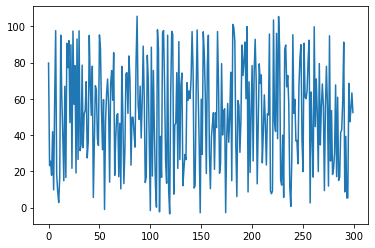

In [10]:
plt.plot(file['fresh time'])

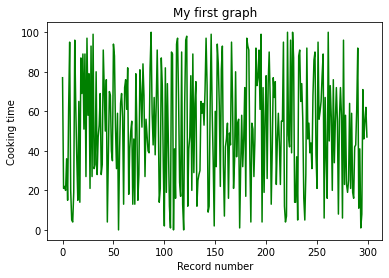

In [13]:
plt.plot(file['cooking time'],color='green')
plt.xlabel("Record number")
plt.ylabel("Cooking time")
plt.title("My first graph")
plt.show()

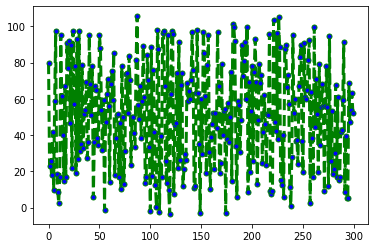

In [25]:
plt.plot(file['fresh time'],marker='o',markerfacecolor='Blue',markersize=5
         ,color='green',linewidth=3,linestyle='dashed')

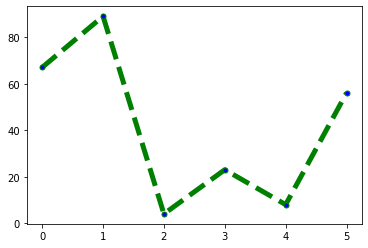

In [22]:
plt.plot(file2['num1'],marker='o',markerfacecolor='Blue',markersize=5,color='green',linewidth=5,linestyle='dashed')

In [28]:
file.groupby('cooking time')['fresh time'].count() ## groupimg fresh time acc to cooking time

cooking time
0      3
1      3
2      2
4      5
5      3
      ..
96     4
97     4
98     1
99     3
100    4
Name: fresh time, Length: 97, dtype: int64

In [7]:
values=(3,2,5,4,1)
labels=('0','2','4','96','98')

([<matplotlib.patches.Wedge at 0x22c891ac0a0>,
 [Text(0.8899186877588753, 0.6465637858537406, '0'),
  Text(-0.11498135397869183, 1.0939740802401248, '2'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, '4'),
  Text(0.3399188701202255, -1.0461621106387813, '96'),
  Text(1.075962411840778, -0.22870261980523152, '98')])

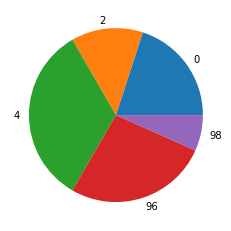

In [30]:
plt.pie(values,labels=labels)

<BarContainer object of 5 artists>

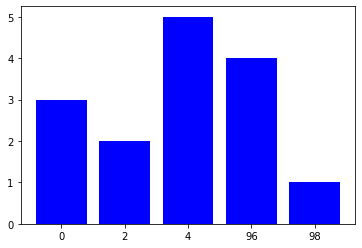

In [31]:
plt.bar(labels,values,color='Blue')

Text(0.5, 1.0, 'Graph')

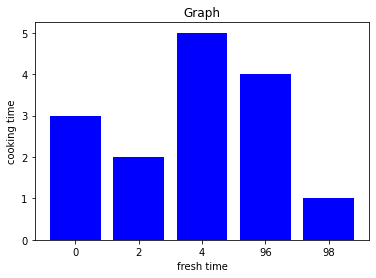

In [8]:
plt.bar(labels,values,color='Blue',linewidth=5,linestyle='dashed')
plt.xlabel("fresh time")
plt.ylabel("cooking time")
plt.title("Graph")

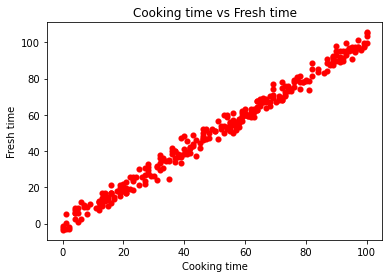

In [15]:
## scatter for how one thing is changing with another thing
plt.scatter(x=file['cooking time'],y=file['fresh time'],color='Red',linewidth=0.09)
plt.xlabel("Cooking time")
plt.ylabel("Fresh time")
plt.title("Cooking time vs Fresh time")
plt.show()

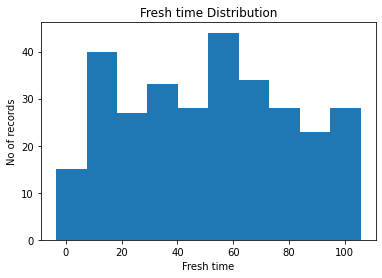

In [24]:
plt.hist(file['fresh time'],bins=10)  ## no of records in data corresponding to definite slots
plt.xlabel("Fresh time")
plt.ylabel("No of records")
plt.title("Fresh time Distribution")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x20dfee34b50>,
 'caps': [<matplotlib.lines.Line2D at 0x20dfee412b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20dfee347c0>],
 'medians': [<matplotlib.lines.Line2D at 0x20dfee419d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20dfee41d60>],
 'means': []}

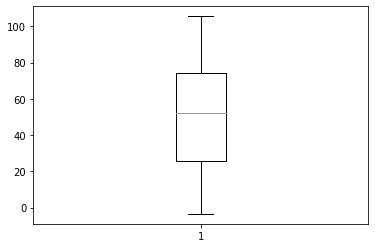

In [28]:
plt.boxplot(file['fresh time'])   
# data is centered along higher values or lower or has comparatively equal.
# like in this this values are slighlty more with lesser values.

C:\Users\HP\AppData\Local\Temp/ipykernel_18112/1082940492.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file['Estimated time to serve'][file['cooking time']==str(i)]=file['fresh time'][file['cooking time']==str(i)].mean()


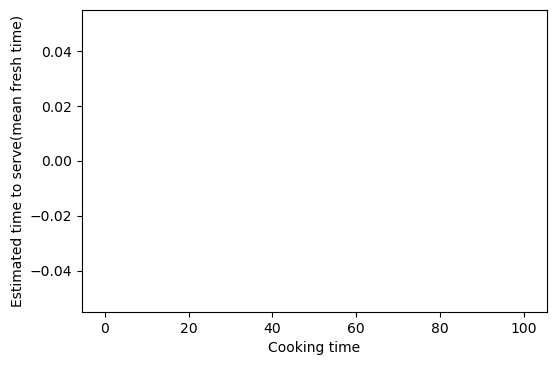

In [34]:
# Initializing new column
file['Estimated time to serve']=0

# calculating mean based on cooking time
for i in file['cooking time'].unique():
    file['Estimated time to serve'][file['cooking time']==str(i)]=file['fresh time'][file['cooking time']==str(i)].mean()
    ## for every unique value of cooking time the mean acc to fresh time is stored in the column we made.

plt.figure(dpi=100)
plt.bar(file['cooking time'].unique(),file['Estimated time to serve'].unique())
plt.xlabel("Cooking time")
plt.ylabel("Estimated time to serve(mean fresh time)")
plt.show()

### These are not showing results as dataset in not appropriate so use it where it will be suited.

C:\Users\HP\AppData\Local\Temp/ipykernel_18112/551524959.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file2['Mean'][file2['num2']==str(i)]=file2['num1'][file2['num2']==str(i)].mean()


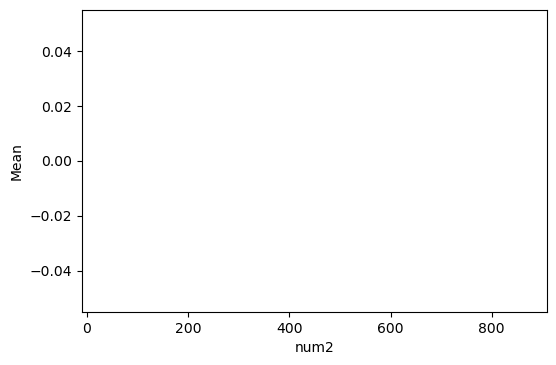

In [33]:
# Initializing new column
file2['Mean']=0

# calculating mean based on cooking time
for i in file2['num2'].unique():
    file2['Mean'][file2['num2']==str(i)]=file2['num1'][file2['num2']==str(i)].mean()
    ## for every unique value of cooking time the mean acc to fresh time is stored in the column we made.

plt.figure(dpi=100)
plt.bar(file2['num2'].unique(),file2['Mean'].unique())
plt.xlabel("num2")
plt.ylabel("Mean")
plt.show()

## If you want to calculate mean wrt more than one aspects (let n) then apply n nested loops and n condition bound by &(and) rest same. You can see it in slid 2nd notes.

In [35]:
Estimated_time = file.groupby(["fresh time"])["cooking time"].mean()
#              (dataframe)(list of column to be groupby)(column to be grouped)(how to group)
Estimated_time

fresh time
-3.467884        0.0
-2.819914        2.0
-2.761183        1.0
-2.344739        0.0
-1.632968        2.0
               ...  
 99.873827      99.0
 101.069788     97.0
 103.526616    100.0
 105.450379    100.0
 105.591837    100.0
Name: cooking time, Length: 300, dtype: float64

## This dataset in not good example to show this try it on another which can be grouped 
## and it the same as calculation we have done above

### panda.pivot_table() works just as groupby but it can handle complex aggregations and organize to our needs.

In [36]:
est_time = pd.pivot_table(file,index=["fresh time"],values=["cooking time"],aggfunc=np.mean)
est_time

,cooking time
fresh time,
-3.467884,0
-2.819914,2
-2.761183,1
-2.344739,0
-1.632968,2
...,...
99.873827,99
101.069788,97
103.526616,100


### An another format in which we can see data by pivot table is shown in slid Graph note which is more organise.

### See some slid notes for panda.map and apply function working. Usefull........